## Validation with Training and Test Data

First, we show how to validate a models performance using a training and test set.

In [2]:
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn.lda import LDA
from sklearn.qda import QDA
iris = datasets.load_iris()

### 1) Split the data into training and test

In [3]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
               iris.data, iris.target, test_size=0.4, random_state=0)

### 2) Fit the models on the training data

In [4]:
lda_fit = LDA().fit(X_train, y_train)
qda_fit = QDA().fit(X_train, y_train)

### 3) Compare the performance on the test data

In [7]:
print("LDA: Percent correctly classified is",lda_fit.score(X_test, y_test))
print("QDA: Percent correctly classified is",qda_fit.score(X_test, y_test))
      

LDA: Percent correctly classified is 0.95
QDA: Percent correctly classified is 0.966666666667


## Measuring Permormance for Classification (part 1)

The following image shows a number of measures of performance

1. Sensitivity
2. Specificity
3. Positive predictive value
4. Negative predictive value

<img src="https://alpine.atlassian.net/wiki/download/attachments/8683817/worddav7e554adba6b6cb09a18a99c8188e7254.png?version=1&modificationDate=1353367357000&api=v2&effects=drop-shadow" width:"400">

### Calculating other metrics

In [11]:
from sklearn import metrics


# We need the predicted values for the test set

y_test_predict = lda_fit.predict(X_test)

print("Confusion matrix")
metrics.confusion_matrix(y_test, y_test_predict)

Confusion matrix


array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  2, 19]])

Now we could calculate the various values

## Cross Validation

In [3]:
import pandas as pd
data = pd.read_csv('chwirut2.csv')
data.head()

,y,x
0,92.9000,0.50
1,57.1000,1.00
2,31.0500,1.75
3,11.5875,3.75
4,8.0250,5.75


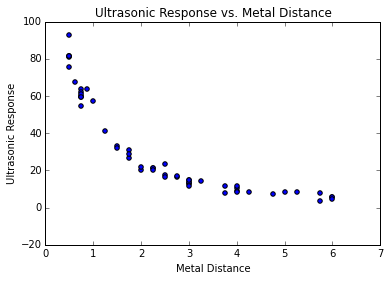

In [6]:
import pylab as pl
%matplotlib inline
pl.scatter(data.x, data.y)
pl.title("Ultrasonic Response vs. Metal Distance")
pl.xlabel("Metal Distance")
pl.ylabel("Ultrasonic Response")
y = data['y']
x = data[['x']]

### Cross Validation Step 1: Divide the data into $k$ randomly selected folds

/Users/tiverson/.pyenv/versions/anaconda3-2.0.0/lib/python3.4/site-packages/sklearn/cross_validation.py:65: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


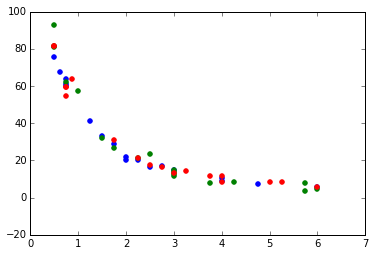

In [7]:
from sklearn.cross_validation import KFold
kf = KFold(len(y), n_folds=3, indices=False, shuffle=True)
colors = ['blue', 'green', 'red']
i=0
for train, test in kf:
    pl.scatter(data['x'][test],data['y'][test], color=colors[i])
    i += 1

For each fold (called the test set) there is a corresponding train set, which is the rest of the data.

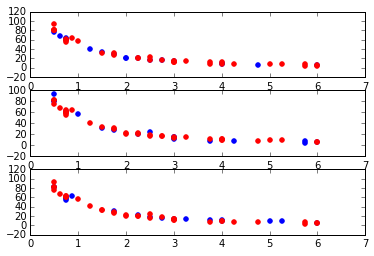

In [8]:
fig, ax = pl.subplots(3, 1)
i=0
for train, test in kf:
    ax[i].scatter(data['x'][test],data['y'][test], color='blue')
    ax[i].scatter(data['x'][train],data['y'][train], color='red')
    i += 1

We fit a linear model on each training set and measure the distance from the model to the test points.

## Logistic Regression

The following data, `Pima Indian Diabetes`, can be found at the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Source:

#### Original Owners:

National Institute of Diabetes and Digestive and Kidney Diseases

#### Donor of database:

Vincent Sigillito (vgs '@' aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231

### Data Set Information:

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices. It is a unique algorithm; see the paper for details.

### Attribute Information:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

#### ** UPDATE: Until 02/28/2011 this web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true: there are zeros in places where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions.




In [9]:
import numpy as np
import pylab as pl
import pandas as pd
import sympy as sp
sp.init_printing()

In [10]:
data = pd.read_csv('pima_diabetes.csv')
data.head(10)

,num_pregnancies,ogtt,blood_pressure,skin_fold,2hour_serum,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


([<matplotlib.axis.YTick at 0x11168d4a8>,
 <a list of 2 Text yticklabel objects>)

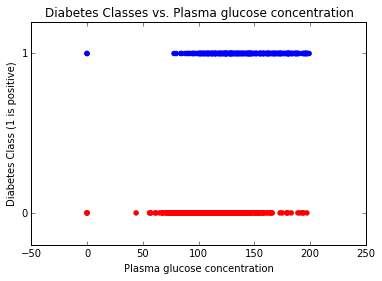

In [11]:
x1 = data['ogtt']
y = data['class']
class_color = ['blue' if check else 'red' for check in data['class'] == 1]
pl.scatter(x1, y, color = class_color)
pl.title("Diabetes Classes vs. Plasma glucose concentration")
pl.ylabel("Diabetes Class (1 is positive)")
pl.xlabel("Plasma glucose concentration")
pl.yticks([0,1])

### Using `sklearn` to Fit and Plot Logistic Regression: One Feature

Instead of performing gradient descent or Newton's method, we will start by using a python package called `sklearn` which will automate the fitting process.

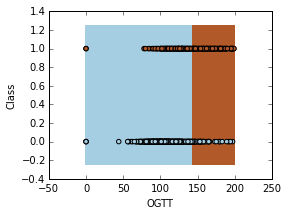

In [13]:
from sklearn import linear_model

# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt']]
# The Y vector must be 1D
Y = data['class']

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = -0.25, 1.25
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = logreg.predict(np.c_[xx.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], Y , c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('Class')

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 1</H1>

1. Fit and plot the decision regions for logistic regression using BMI as the only feature.
2. Fit and plot the decision regions for logistic regression for three other individual features.

### Using `sklearn` to Fit and Plot Logistic Regression: Two Features

Now let's fit two features, OGTT and BMI

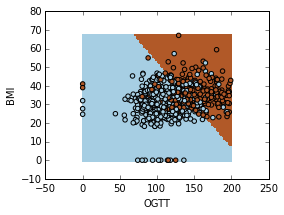

In [14]:
import numpy as np
import pylab as pl
from sklearn import linear_model, datasets

# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt','BMI']]
# The Y vector must be 1D
Y = data['class']

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = X.min()[1] - .5, X.max()[1] + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], X['BMI'], c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('BMI')

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 2</H1>

1. Fit and plot the decision regions for logistic regression using BMI and blood pressure as the only features.
2. Fit and plot the decision regions for logistic regression for three more pairs of features.

## Performing cross validation with no parameter

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 3</H1>

Compare logistic regression, LDA, and QDA using BMI and blood pressure as the only features.  Make the comparisons using training and test sets and compare for accuracy and all other metrics given above.

### Using `sympy` to Set Up Logistic Regression

We will be using `sympy` to obtain the symbolic formulas for logistic regression.


#### A Formula for $h_{\vec{\theta}}(x)$

The following code will generate a vector that contains the formula for $h_{\vec{\theta}}(x_i)$ in the ith entry.

In [15]:
#Set k to be the number of features x
k = 1
#Create the design matrix X
data['ones'] = 1
Xmat = sp.Matrix(data[['ones','ogtt']])
#Use list comprehension to obtain a theta vector
theta_vec = sp.Matrix([[sp.Symbol('t' + str(i))] for i in range(k+1)])
theta_vec

The linear model $\theta_0 + \theta_1 x_1 + \cdots + \theta_k x_k$ can be written as $X\vec{\theta}$, where $X$ is the design matrix.  The *logistic regression hypothesis function* is given by

$$ h_{\vec{\theta}}(\vec{x}_i) = \frac{1}{1 + e^{\vec{x}_i^T \vec{\theta}}} $$

where $\vec{x}_i^T$ is the ith row of the design matrix $X$.  Consequently, $\vec{x}_i^T\vec{\theta}$ is the ith row of the design matrix $X\vec{\theta}$

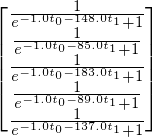

In [16]:
#Make a symbolic vector for X*theta 
X_theta = Xmat*theta_vec
#Use list comprehension to obtain a vector for h_\theta
h_theta_vec = sp.Matrix([[1/(1 + sp.exp(-1*x))] for x in X_theta])
h_theta_vec[:5,:]

The likelihood is given by 

$$ L\left(\vec{\theta}\right) = P\left(\vec{y} \mid x, \vec{\theta}\right) = \prod_{i=1}^m h_{\vec{\theta}}(x^{(i)})^{y^{(i)}}\left( 1 - h_{\vec{\theta}}(x^{(i)})^y_{(i)}\right)^{1-y^{(i)}} $$

And the log-likelihood is

$$ l\left(\vec{\theta}\right) = \log L\left(\vec{\theta}\right) = \sum_{i=1}^m y^{(i)} \log \left(h_{\vec{\theta}}(x^{(i)})\right) + \left(1-y^{(i)}\right)\left( 1 - h_{\vec{\theta}}(x^{(i)})^y_{(i)}\right)$$



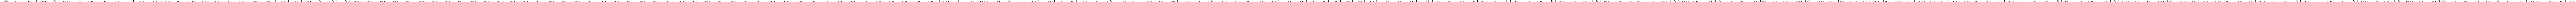

In [17]:
prob_vec = sp.Matrix([[y*sp.ln(h) + (1 - y)*sp.ln(1-h)] for y,h in zip(data['class'],h_theta_vec)])
l_theta = prob_vec[0,0]
for formula in prob_vec[1:,:]:
    l_theta += formula
l_theta

At this point, we would calculate the gradient vector.  Unfortunately, this was too much for my laptop and the notebook locked up.

Recall that the gradient descent update given in class was given by

$$ \theta_{j+1} := \theta_j + \alpha\sum_{i=1}^{m} \left(y^{(i)} - h_{\theta_j}\left(x^{(i)}\right)\right)x^{(j)} $$

Since this problem is too large for a symbolic solution, let's implement a numeric solution. 

In [18]:
def logistic_update(Xmat, Yvec, theta, alpha):
    Xt = X*theta
    h_theta = 1.0/(1.0+np.exp(-1.0*Xt))
    return theta np.sum(Yvec - h_theta)

SyntaxError: invalid syntax (<ipython-input-18-0ce6d916b9c0>, line 4)

In [ ]:
x2 = data['BMI']
pl.scatter(x2, y, color = class_color)
pl.title("Diabetes Classes vs. Body Mass Index")
pl.ylabel("Diabetes Class (1 is positive)")
pl.xlabel("BMI ($kg/m^2$)")
pl.yticks([0,1])

In [ ]:
x3 = data['2hour_serum']
pl.scatter(x3, y, color = class_color)
pl.title("Diabetes Classes vs. 2-Hour serum insulin")
pl.ylabel("Diabetes Class (1 is positive)")
pl.xlabel("2-Hour serum insulin ($\mu U/ml$)")
pl.yticks([0,1])

In [ ]:
pl.scatter(x1, x2, color = class_color)

In [ ]:
pl.scatter(x1, x3, color = class_color)

In [ ]:
pl.scatter(x2, x3, color = class_color)